In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(columns=['Calories', 'Breakfast', 'Lunch', 'Dinner','Build'])

In [3]:
df.loc[0] = [1100, 1, 0, 0, 'Thin']
df.loc[1] = [2900, 1, 1, 1, 'Normal']
df.loc[2] = [3600, 2, 2, 1, 'Overweight']
df.loc[3] = [1300, 0, 1, 0, 'Thin']
df.loc[4] = [6000, 2, 2, 2, 'Overweight']
df.loc[5] = [1200, 0, 0, 1, 'Thin']
df.loc[6] = [3000, 1, 0, 1, 'Normal']
df.loc[7] = [5000, 2, 2, 2, 'Overweight']
df.loc[8] = [2700, 0, 2, 0, 'Normal']
df.loc[9] = [4000, 1, 2, 1, 'Overweight']

In [4]:
X = df[['Calories', 'Breakfast', 'Lunch', 'Dinner']]
X

,Calories,Breakfast,Lunch,Dinner
0,1100,1,0,0
1,2900,1,1,1
2,3600,2,2,1
3,1300,0,1,0
4,6000,2,2,2
5,1200,0,0,1
6,3000,1,0,1
7,5000,2,2,2
8,2700,0,2,0
9,4000,1,2,1


In [5]:
# Y is label to plot the values
Y = df[['Build']]

In [6]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [7]:
x_std 

array([[-1.27447858,  0.        , -1.3764944 , -1.28571429],
       [-0.11586169,  0.        , -0.22941573,  0.14285714],
       [ 0.33471155,  1.29099445,  0.91766294,  0.14285714],
       [-1.14574337, -1.29099445, -0.22941573, -1.28571429],
       [ 1.87953407,  1.29099445,  0.91766294,  1.57142857],
       [-1.21011098, -1.29099445, -1.3764944 ,  0.14285714],
       [-0.05149408,  0.        , -1.3764944 ,  0.14285714],
       [ 1.23585802,  1.29099445,  0.91766294,  1.57142857],
       [-0.2445969 , -1.29099445,  0.91766294, -1.28571429],
       [ 0.59218197,  0.        ,  0.91766294,  0.14285714]])

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
features = x_std.T
cov_mat = np.cov(features)
print(cov_mat)

[[1.11111111 0.86791475 0.80725946 0.9174938 ]
 [0.86791475 1.11111111 0.49362406 0.81967902]
 [0.80725946 0.49362406 1.11111111 0.40056715]
 [0.9174938  0.81967902 0.40056715 1.11111111]]


In [10]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [11]:
print('Eigenvalues \n%s' %eig_vals)

Eigenvalues 
[3.29813505 0.78262395 0.06478424 0.2989012 ]


In [12]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[ 0.56485621  0.08387495  0.7954525   0.2028738 ]
 [ 0.50617588 -0.31290077 -0.12392874 -0.79405337]
 [ 0.4148066   0.82618255 -0.38125477 -0.00163671]
 [ 0.50265189 -0.46095607 -0.45446869  0.57299109]]


In [13]:
eig_vals_total = np.sum(eig_vals)
var_exp = eig_vals / eig_vals_total
print('Variance Explained: ', var_exp)

Variance Explained:  [0.74208039 0.17609039 0.01457646 0.06725277]


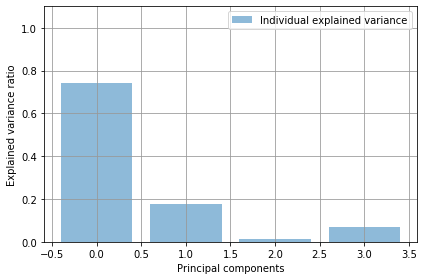

In [14]:
plt.bar(range(var_exp.shape[0]), var_exp, alpha = 0.5, 
        align = 'center', label = 'Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.ylim(0, 1.1)
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.legend(loc = 'best')
plt.tight_layout()

From the above we can deduce that most of the variance (74.2% of the variance) can be explained by the first principal component alone.
The second principal component still bears some information (17.6%) while the third and fourth principal components can be safely dropped without losing to much information.

The first  principal components explains 74.2% of the variance. In other words, it contain 74.2% of the information.

In [15]:
projected_X = x_std.dot(eig_vecs.T[0])

In [16]:
projected_X

array([-1.93714282, -0.08880094,  1.2949942 , -2.04208039,  2.88567093,
       -1.8361805 , -0.5282583 ,  2.52208652, -1.05724641,  0.78695772])

In [17]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0 
result['category'] = Y

In [18]:
 result.head(10)

,PC1,y-axis,category
0,-1.937143,0.0,Thin
1,-0.088801,0.0,Normal
2,1.294994,0.0,Overweight
3,-2.042080,0.0,Thin
4,2.885671,0.0,Overweight
5,-1.836181,0.0,Thin
6,-0.528258,0.0,Normal
7,2.522087,0.0,Overweight
8,-1.057246,0.0,Normal
9,0.786958,0.0,Overweight


As seen from above we have reduced from 4 dimensions to 1 dimension.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1, 'Results of PCA')

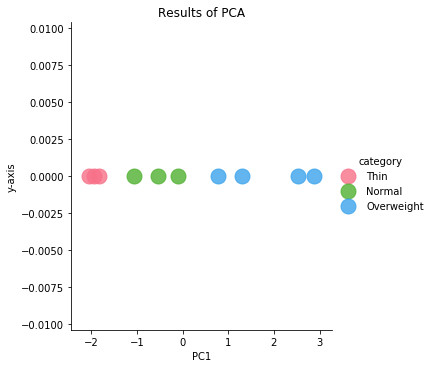

In [20]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  
           scatter_kws={"s": 900},
           hue="category",
           markers = '.',
           palette="husl") 
plt.title('Results of PCA')

# Using scikit-learn

In [21]:
from sklearn import decomposition
PCA = decomposition.PCA(n_components=1)
PCA_x = PCA.fit_transform(x_std)

Text(0.5, 1, 'Results of sklearn_PCA')

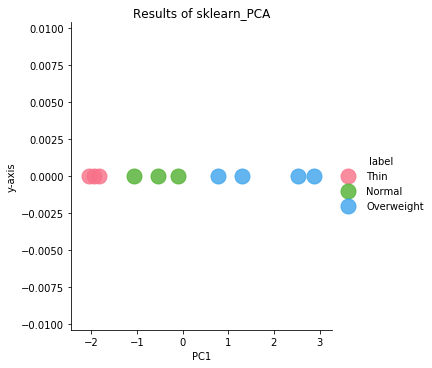

In [22]:
sklearn_result=pd.DataFrame(PCA_x, columns=['PC1'])
sklearn_result['y-axis']= 0.0
sklearn_result['label'] = Y
sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False, 
           scatter_kws={"s": 900}, 
           hue="label",
           markers = '.',
           palette="husl") 
plt.title('Results of sklearn_PCA')

We can see here that by implementing the PCA algorithm ourselves and using the API, the same results are obtained.